Nama : Bayu Ramadan, Nim : G.231.22.0072

In [2]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/retail_raw_reduced.csv')

In [4]:
dset['order_month'] = dset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))

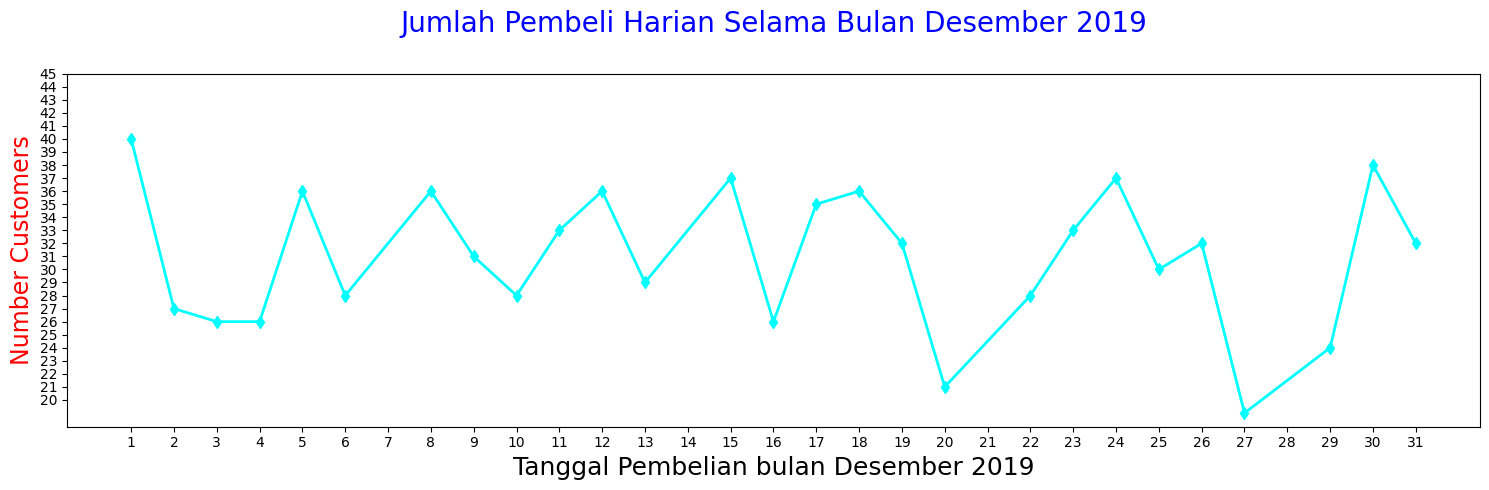

In [5]:
dset['order_date'] = pd.to_datetime(dset['order_date'])
december_data = dset[(dset['order_date'].dt.month == 12) & (dset['order_date'].dt.year == 2019)]
dset['order_date'] = pd.to_datetime(dset['order_date'])
daily_customers = december_data.groupby(december_data['order_date'].dt.day)['customer_id'].nunique()
plt.figure(figsize=(15, 5))
plt.plot(daily_customers.index,daily_customers.values,  color='cyan',marker='d',linestyle='-', linewidth=2)
plt.title('Jumlah Pembeli Harian Selama Bulan Desember 2019', loc='center',pad=30,fontsize=20,color='blue')
plt.xlabel('Tanggal Pembelian bulan Desember 2019', fontsize=18)
plt.ylabel('Number Customers', fontsize=17,color='red')
plt.xticks(range(1, 32))
plt.yticks(range(20, 46))
plt.tight_layout()
plt.show()

**Case 1 :**

Menentukan brand top 5



In [6]:
top_brands = (dset[dset['order_month']=='2019-12'].groupby('brand')['quantity']
                .sum().reset_index()
                .sort_values(by='quantity',ascending=False).head(5))
dset_top5brand_dec = dset[(dset['order_month']=='2019-12') & (dset['brand']
                                                              .isin(top_brands['brand'].to_list()))]
print(top_brands)

     brand  quantity
8  BRAND_S      2197
6  BRAND_P      2194
7  BRAND_R      1508
2  BRAND_C      1365
0  BRAND_A      1315


**Case 2 :**

Penjualan Top Brand Desember 2019

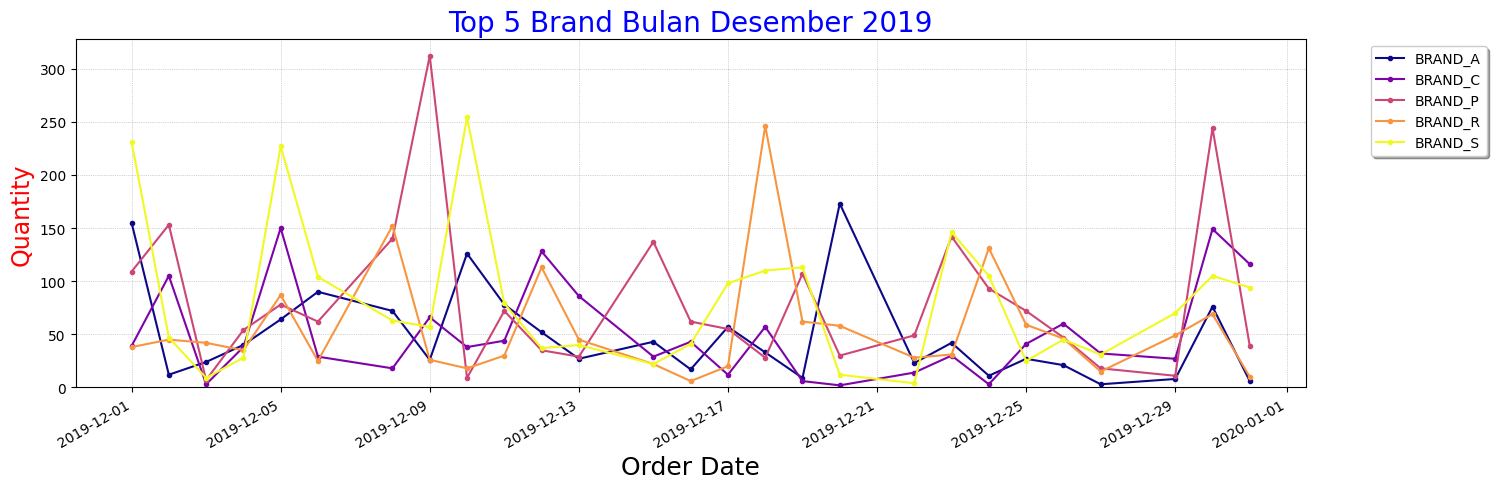

In [7]:
dset_top5brand_dec.groupby(['order_date','brand'])['quantity'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Top 5 Brand Bulan Desember 2019',loc='center', fontsize=20, color='blue')
plt.xlabel('Order Date', fontsize = 18)
plt.ylabel('Quantity',color='red', fontsize = 17)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)
plt.annotate('Lonjakan Terbesar', xy=(7, 310), xytext=(8, 300),
             color='purple',arrowprops=dict(arrowstyle='->',connectionstyle="arc3",color='purple'))
plt.gcf().set_size_inches(15, 5)
plt.tight_layout()
plt.show()

**Case 3 :**

BarChart produk yang paling laku

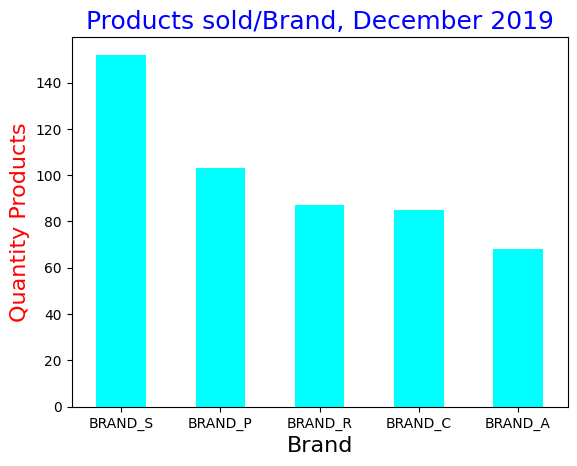

In [8]:
dset_top5brand_dec.groupby('brand')['product_id'].nunique().sort_values(ascending=False).plot(kind='bar', color='cyan')
plt.title('Products sold/Brand, December 2019',loc='center', color='blue', fontsize=18)
plt.xlabel('Brand', fontsize = 16)
plt.ylabel('Quantity Products',fontsize = 16, color='red')
plt.ylim(ymin=0)
plt.xticks(rotation=0)
plt.show()

Case 4 :

Penjualan produk diatas 100 dan dibawah 100 selama Desember 2019

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'BRAND_S'),
  Text(1, 0, 'BRAND_P'),
  Text(2, 0, 'BRAND_R'),
  Text(3, 0, 'BRAND_C'),
  Text(4, 0, 'BRAND_A')])

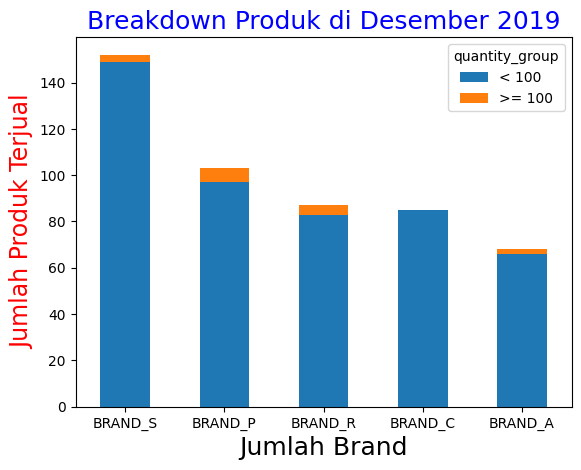

In [9]:
dataset_top5brand_dec_per_product = dset_top5brand_dec.groupby(['brand','product_id'])['quantity'].sum().reset_index()
dataset_top5brand_dec_per_product['quantity_group'] = dataset_top5brand_dec_per_product['quantity'].apply(lambda x: '>= 100' if x>=100 else '< 100')
dataset_top5brand_dec_per_product.sort_values('quantity',ascending=False,inplace=True)
s_sort = dataset_top5brand_dec_per_product.groupby('brand')['product_id'].nunique().sort_values(ascending=False)
dataset_top5brand_dec_per_product.groupby(['brand','quantity_group'])['product_id'].nunique().reindex(index=s_sort.index, level='brand').unstack().plot(kind='bar', stacked=True)
plt.title('Breakdown Produk di Desember 2019',loc='center', fontsize=18, color='blue')
plt.xlabel('Jumlah Brand', fontsize = 18)
plt.ylabel('Jumlah Produk Terjual',fontsize = 17, color='red')
plt.ylim(ymin=0)
plt.xticks(rotation=0)

**Case 5 :**

Murah atau mahalkah harga produk brand top 5

(0.0, 2000000.0)

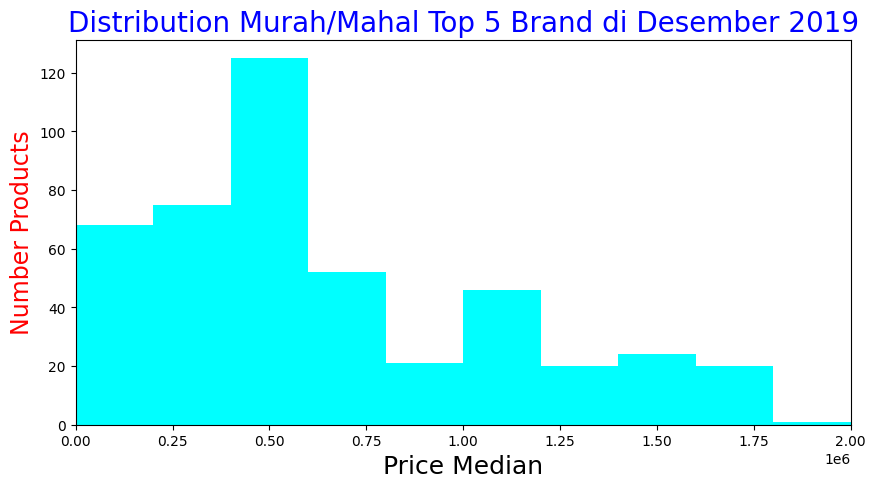

In [10]:
plt.figure(figsize=(10,5))
plt.hist(dset_top5brand_dec.groupby('product_id')['item_price'].median(),
         bins=10, stacked=True, range=(1,2000000), color='cyan')
plt.title('Distribution Murah/Mahal Top 5 Brand di Desember 2019',
          color='blue',fontsize=20)
plt.xlabel('Price Median', fontsize = 18)
plt.ylabel('Number Products',fontsize = 17,
           color='red')
plt.xlim(xmin=0,xmax=2000000)

**Case 6:**

A.) Korelasi quantity vs GMV

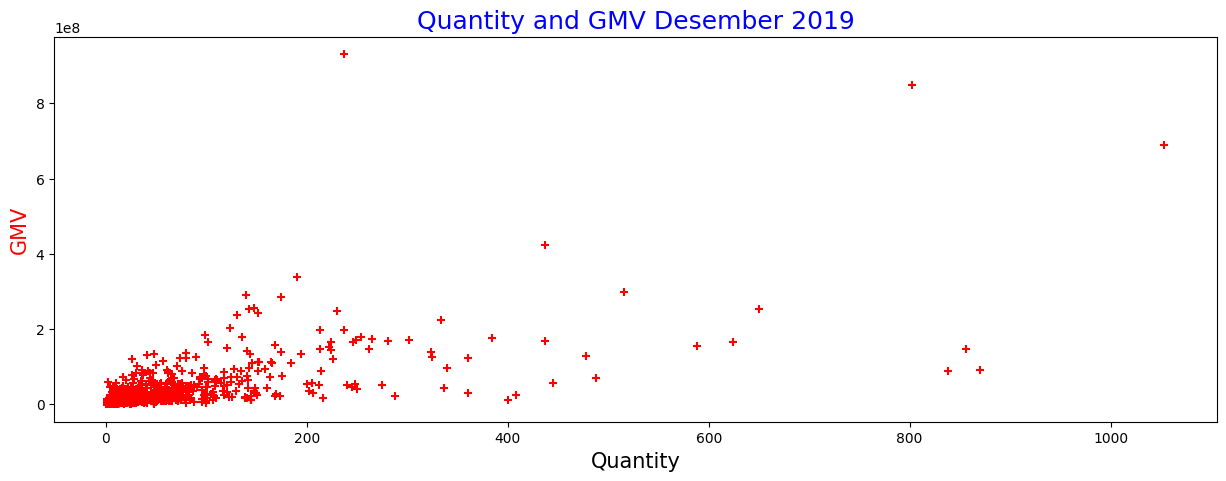

In [11]:
dset['GMV'] = dset['quantity'] * dset['item_price']
data_product = dset.groupby('product_id').agg({
    'quantity': 'sum',
    'GMV': 'sum',
    'item_price': 'median'}).reset_index()
plt.figure(figsize=(15, 5))
plt.scatter(data_product['quantity'],
            data_product['GMV'], marker='+', color='red')
plt.title('Quantity and GMV Desember 2019',
          color='blue', fontsize='18')
plt.ylabel('GMV', color='red', fontsize='15')
plt.xlabel('Quantity', fontsize='15')
correlation_gmv = data_product['quantity'].corr(data_product['GMV'])
plt.show()

B.) Korelasi median harga vs quantity

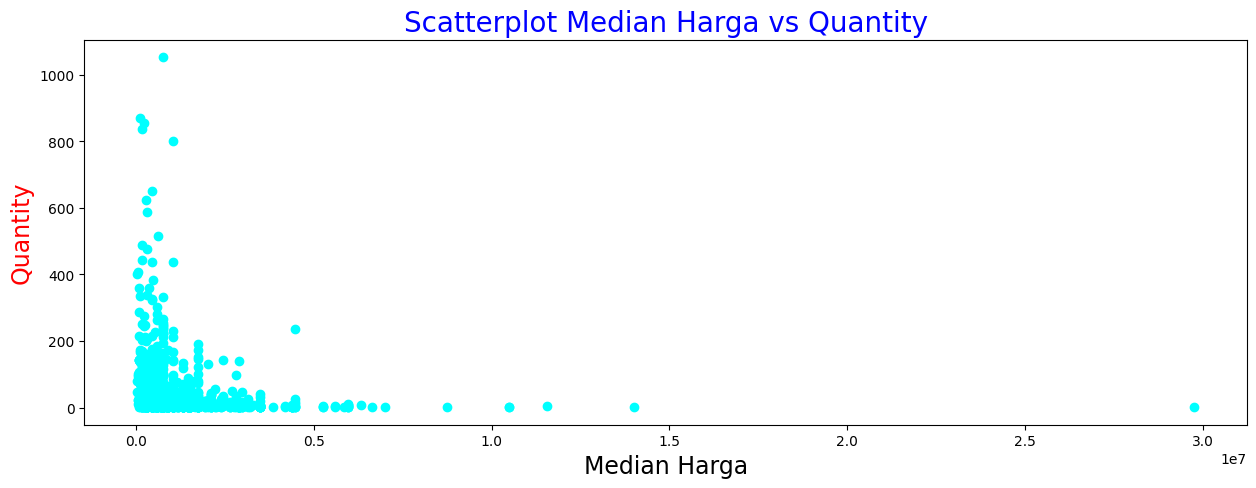

In [12]:
dset['GMV'] = dset['quantity'] * dset['item_price']
data_product = dset.groupby('product_id').agg({'quantity': 'sum','GMV': 'sum','item_price': 'median'}).reset_index()
plt.figure(figsize=(15, 5))
plt.scatter(data_product['item_price'], data_product['quantity'], color='cyan')
plt.title('Scatterplot Median Harga vs Quantity', fontsize ='20', color='blue')
plt.xlabel('Median Harga', fontsize=17)
plt.ylabel('Quantity', fontsize=17, color='red')
correlation_price = data_product['item_price'].corr(data_product['quantity'])
plt.show()